# Stock Market Analysis and Prediction
## Stock Market Data From Google Finance
### Introduction
The project focuses on analyzing and predicting stock market trends using technical analysis, visualization, and data sourced from Google Finance. It examines data from various stocks, including major technology companies, utilizing pandas to gather stock information, visualize key metrics, and assess risk based on historical performance. Future stock prices are forecasted using a Monte Carlo method.
### Questions
In this analysis, I would like to explore the following questions.
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

## Libraries

In [95]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
sns.set_style('darkgrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# For time stamps
import datetime

# For division
from __future__ import division

# For prediction
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

## Basic Analysis of Stock Information
In this section, I will elucidate the process of retrieving stock information using pandas and subsequently analyzing fundamental attributes of a stock.

In [98]:
# List of Tech_stocks for analytics
tech_list=['AAPL', 'GOOGL', 'NVDA', 'AMZN']

# Set up Start and End time for data grab
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

# For-loop grabing google finance data and setting as a dataframe
# Set DataFrame as teh stock Ticker

for stock in tech_list:
    globals()[stock]=pdr.get_data_yahoo(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple.<br><br>
Let's go ahead and play around with the NVDA(Nvidia) Stock DataFrame to get a feel for the data.

In [3]:
NVDA.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  148.509995  149.960007  140.960007  143.149994  143.079788   
2023-01-04  145.669998  148.529999  142.410004  147.490005  147.417679   
2023-01-05  144.910004  145.639999  141.479996  142.649994  142.580048   
2023-01-06  144.740005  150.100006  140.339996  148.589996  148.517136   
2023-01-09  152.839996  160.559998  151.410004  156.279999  156.203369   

              Volume  
Date                  
2023-01-03  40127700  
2023-01-04  43132400  
2023-01-05  38916800  
2023-01-06  40504400  
2023-01-09  50423100

In [4]:
# Summery stats for Apple Stock
NVDA.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   365.151680  371.231319  359.265399  365.692600  365.611465   
std    108.491269  109.169134  106.577841  107.564551  107.574520   
min    144.740005  145.639999  140.339996  142.649994  142.580048   
25%    268.310005  271.710007  264.284988  268.997498  268.911247   
50%    416.354996  425.029999  409.625000  418.934998  418.861282   
75%    457.707504  462.232498  449.882507  456.462494  456.372719   
max    502.160004  505.480011  494.119995  504.089996  504.022034   

             Volume  
count  2.500000e+02  
mean   4.734821e+07  
std    1.614098e+07  
min    1.982090e+07  
25%    3.790238e+07  
50%    4.336650e+07  
75%    5.172652e+07  
max    1.543911e+08

In [5]:
# General Info
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the NVDA (Nvidia) stocks.

In [100]:
company_list = [AAPL, GOOGL, NVDA, AMZN]
company_name = ["APPLE", "GOOGLE", "NVIDIA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [103]:
# Let's see a historical view of the closing price (one stock)
# NVDA['Close'].plot(legend=True, figsize=(10,4))

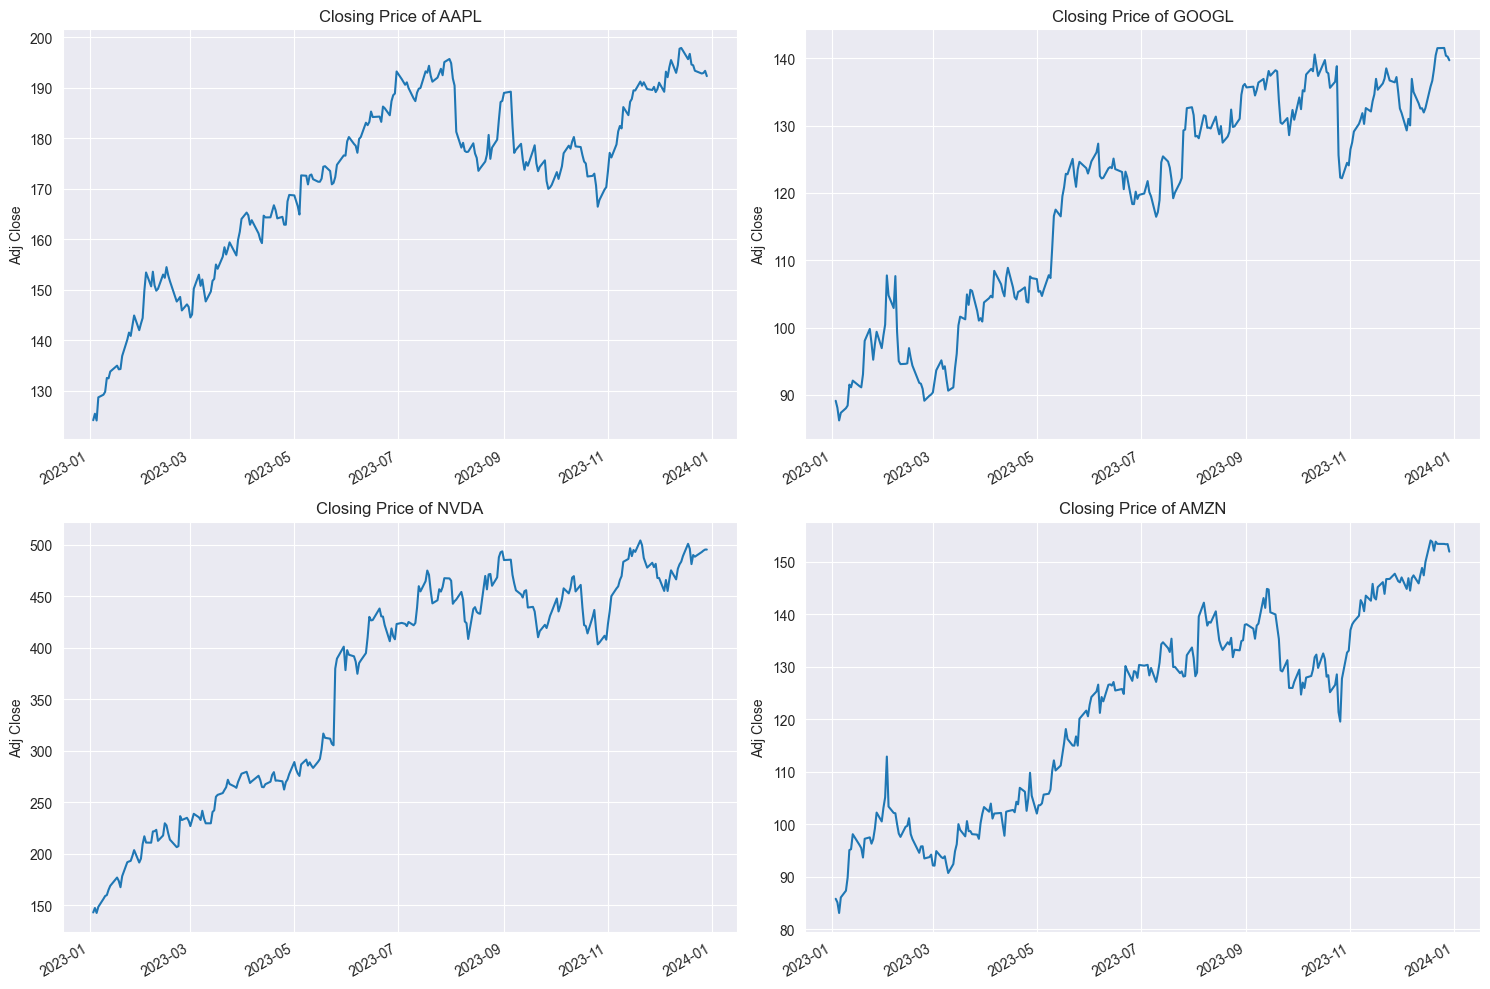

In [101]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

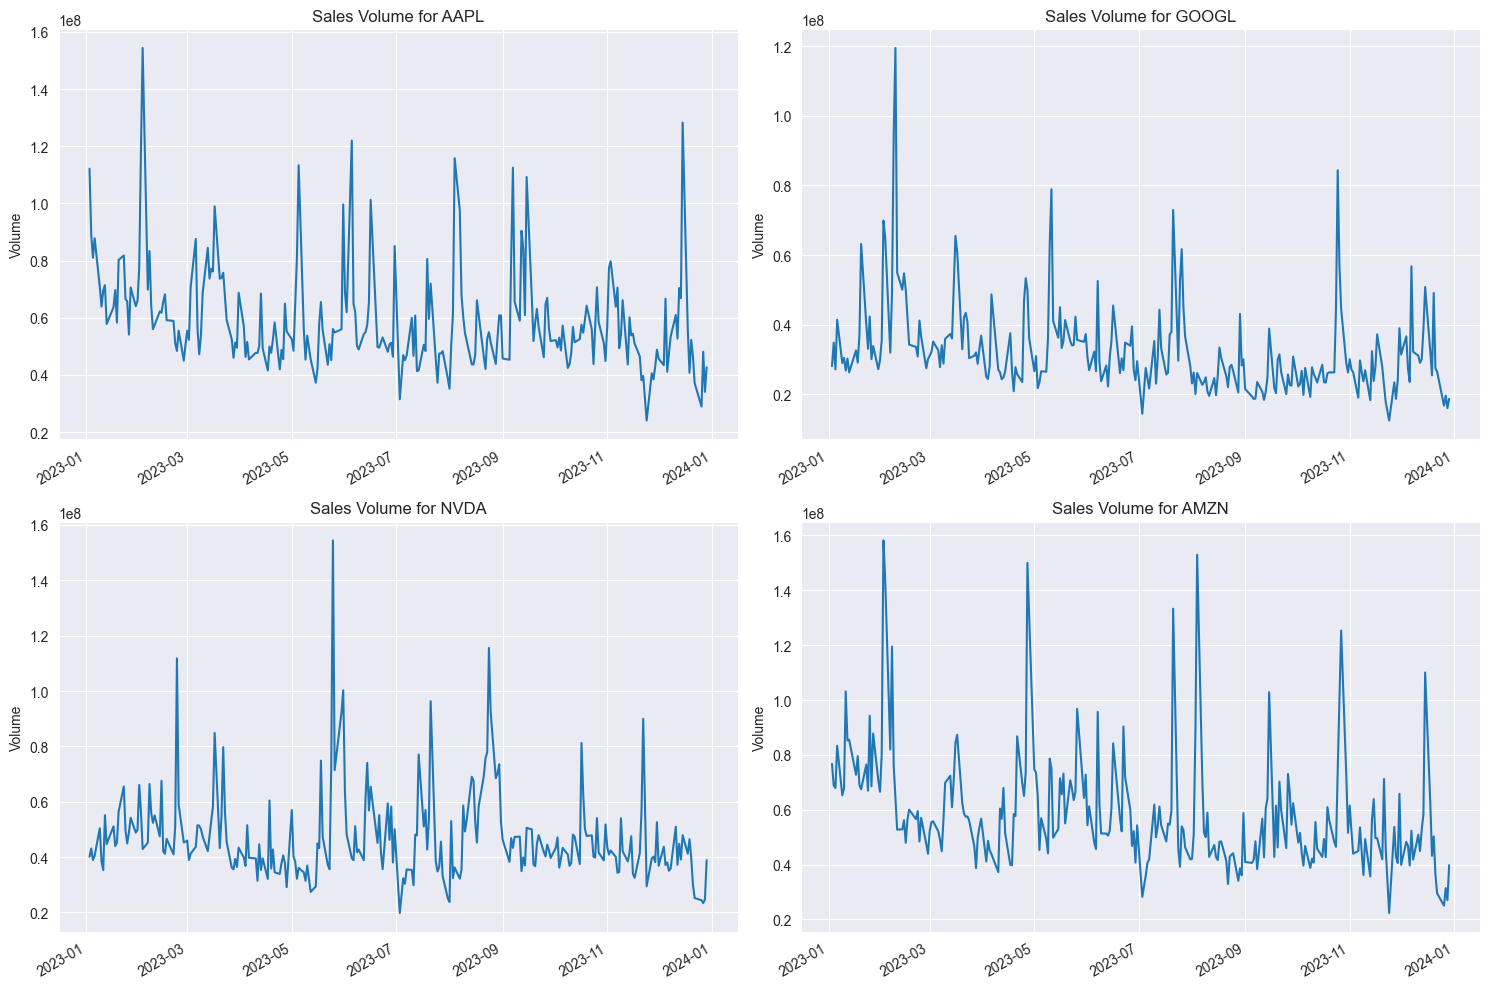

In [104]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

<Axes: xlabel='Date'>

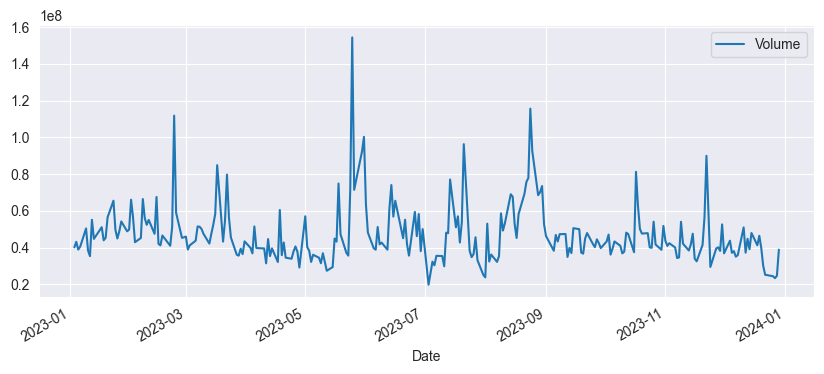

In [7]:
# Now let's plot the total volume of stock being traded each day over the past year
NVDA['Volume'].plot(legend=True, figsize=(10,4))

We can see that on June'2023 was the higher for NVDA stock being traded.
### Moving Average
Now that we've seen the visualizations for the closing price and the volume traded each day for NVDA stock. Let's go ahead and caculate the moving average for the NVDA stock.
For more info on the Moving Average(SMA & EMA) check out the following links:
1. [Moving Average](https://www.investopedia.com/terms/m/movingaverage.asp)
2. [How to use a Moving Average to Buy Stocks](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)


In [8]:
# Let's go ahead and plot out several moving averages
MA_day = [10, 20, 50, 100]

for ma in MA_day:
    column_name = "MA for %s days" % ma
    NVDA[column_name] = NVDA['Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

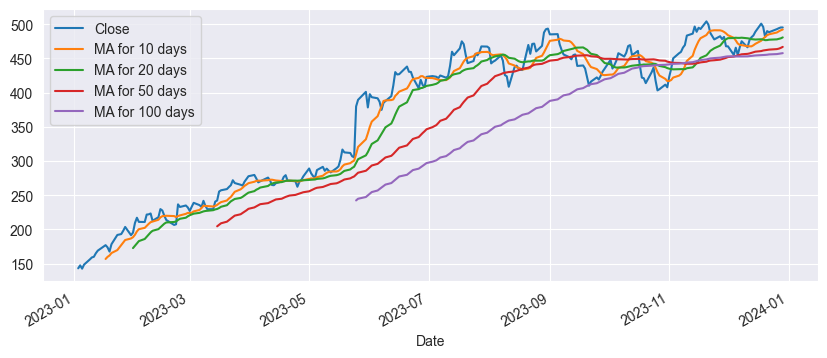

In [9]:
labels_ma=['Close',
           'MA for 10 days',
           'MA for 20 days',
           'MA for 50 days',
           'MA for 100 days']

NVDA[labels_ma].plot(subplots=False,figsize=(10,4))

#### Moving average of the various stocks

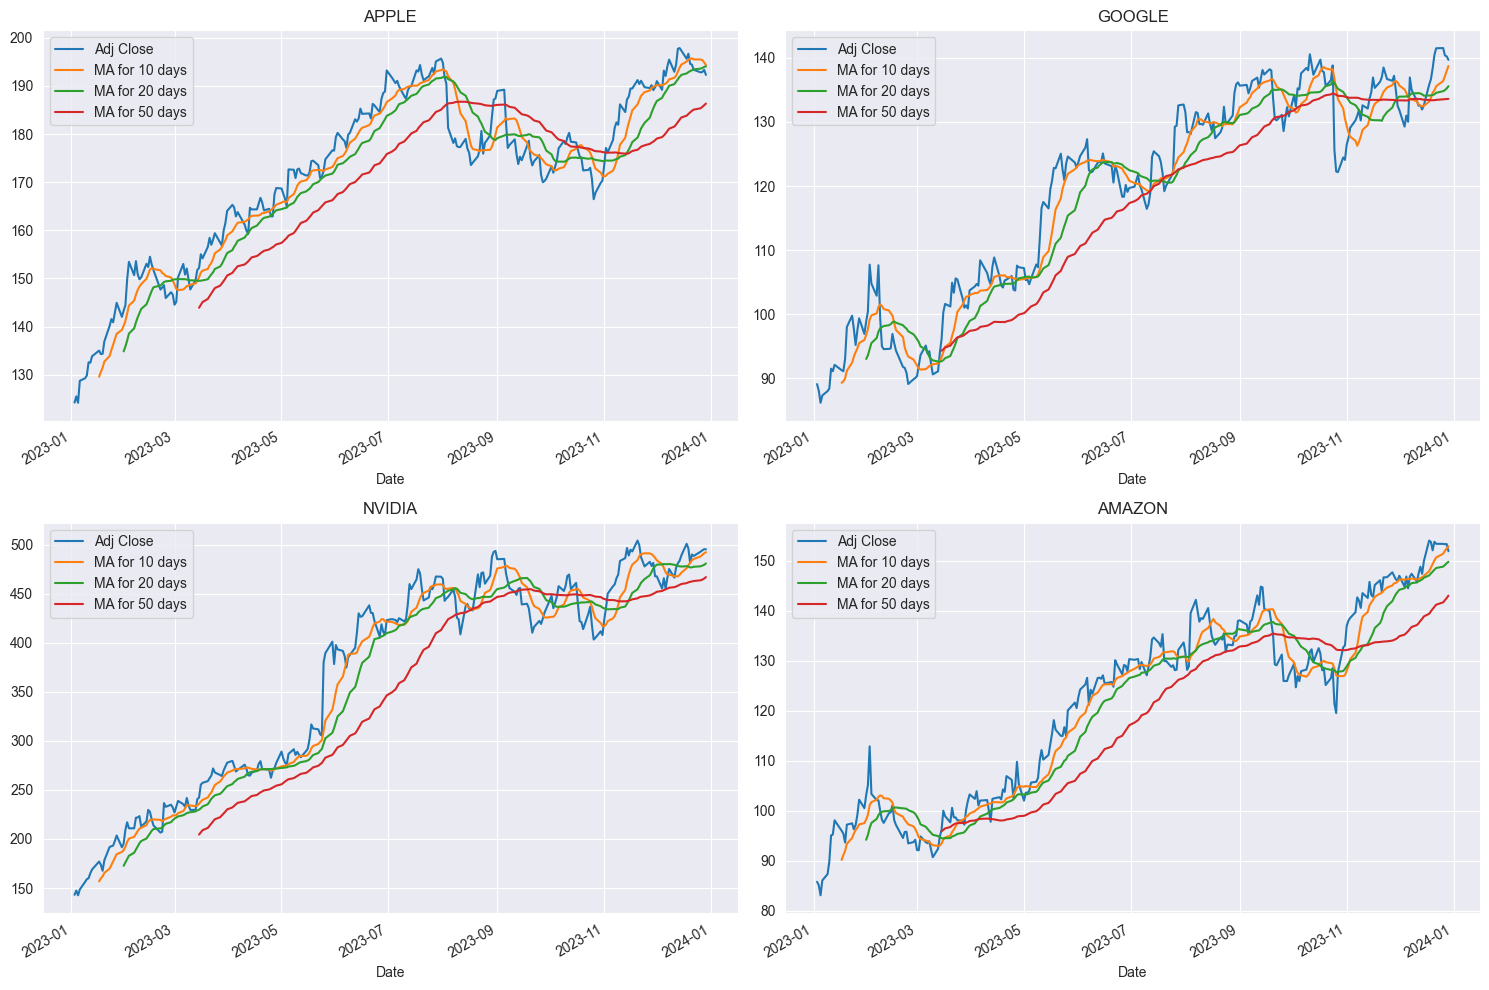

In [106]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOGL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NVIDIA')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily Return Analysis
Now that we've completed some initial analysis, let's delve further into the details. Our next step is to assess the stock's risk.<br><br>
To accomplish this, we must examine the daily fluctuations of the stock, rather than solely focusing on its absolute value. Let's proceed by utilizing pandas to extract the daily returns for the NVDA stock.

<Axes: xlabel='Date'>

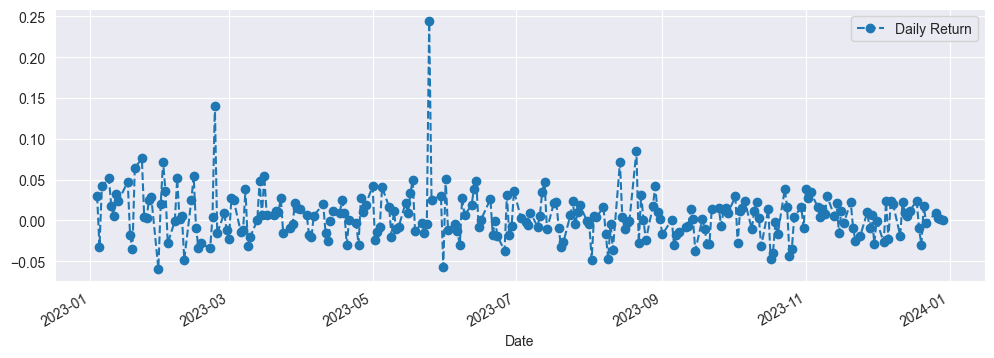

In [10]:
# We'll use pct_change to find the percent change for each day
NVDA['Daily Return'] = NVDA['Close'].pct_change()

# Lets plot the daily return percentage
NVDA['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

#### Daily Return of the various stocks

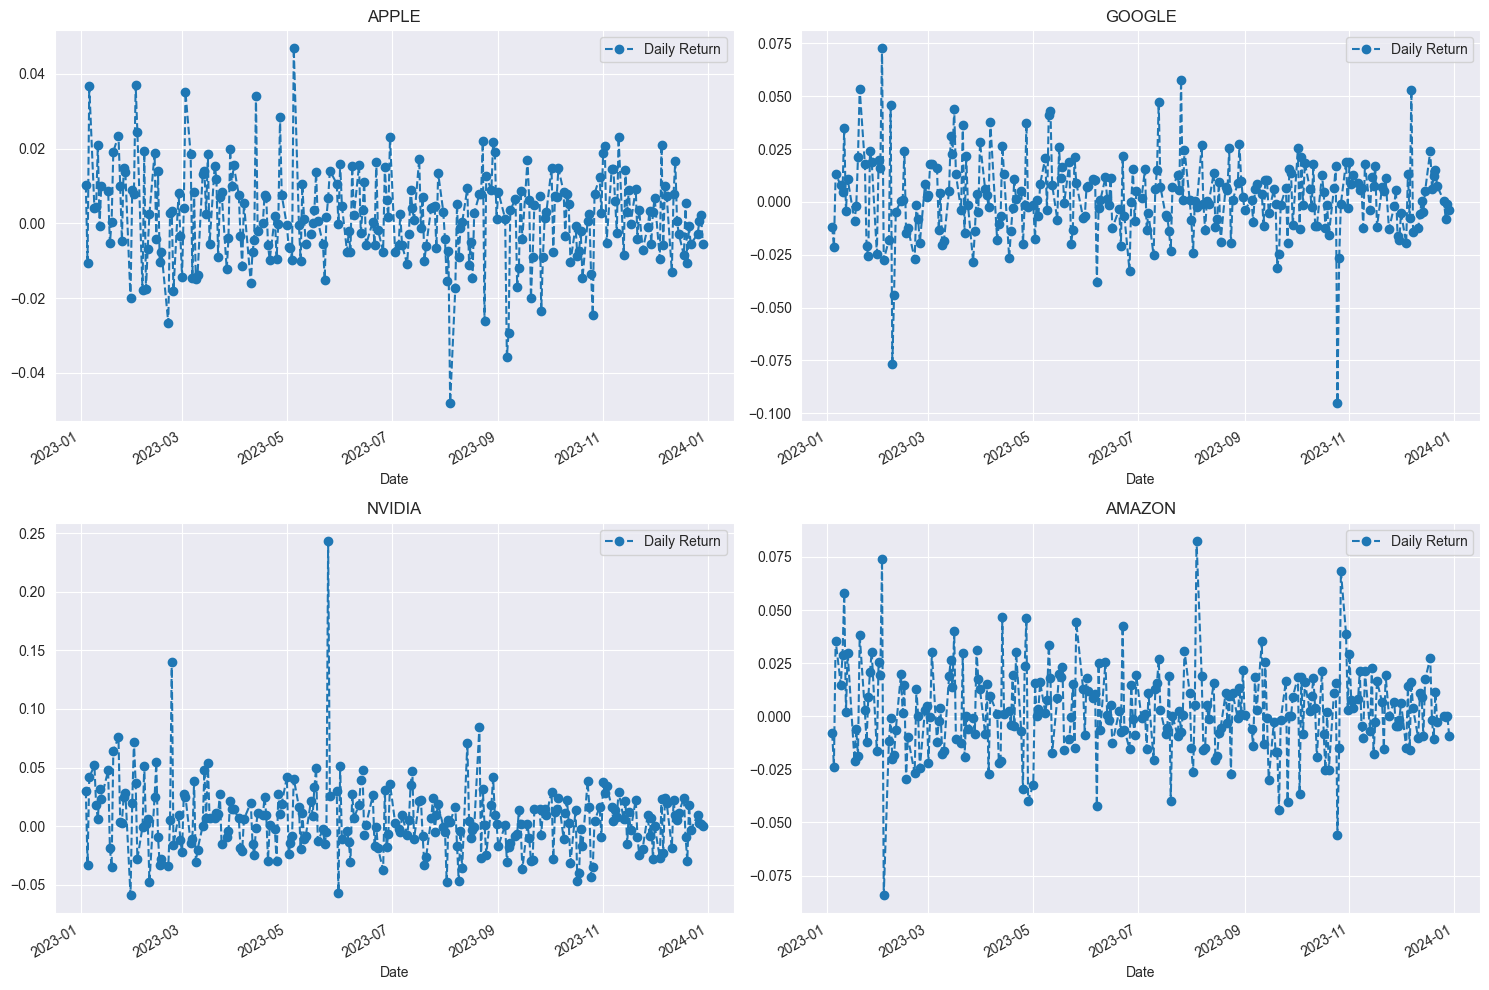

In [107]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOGL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

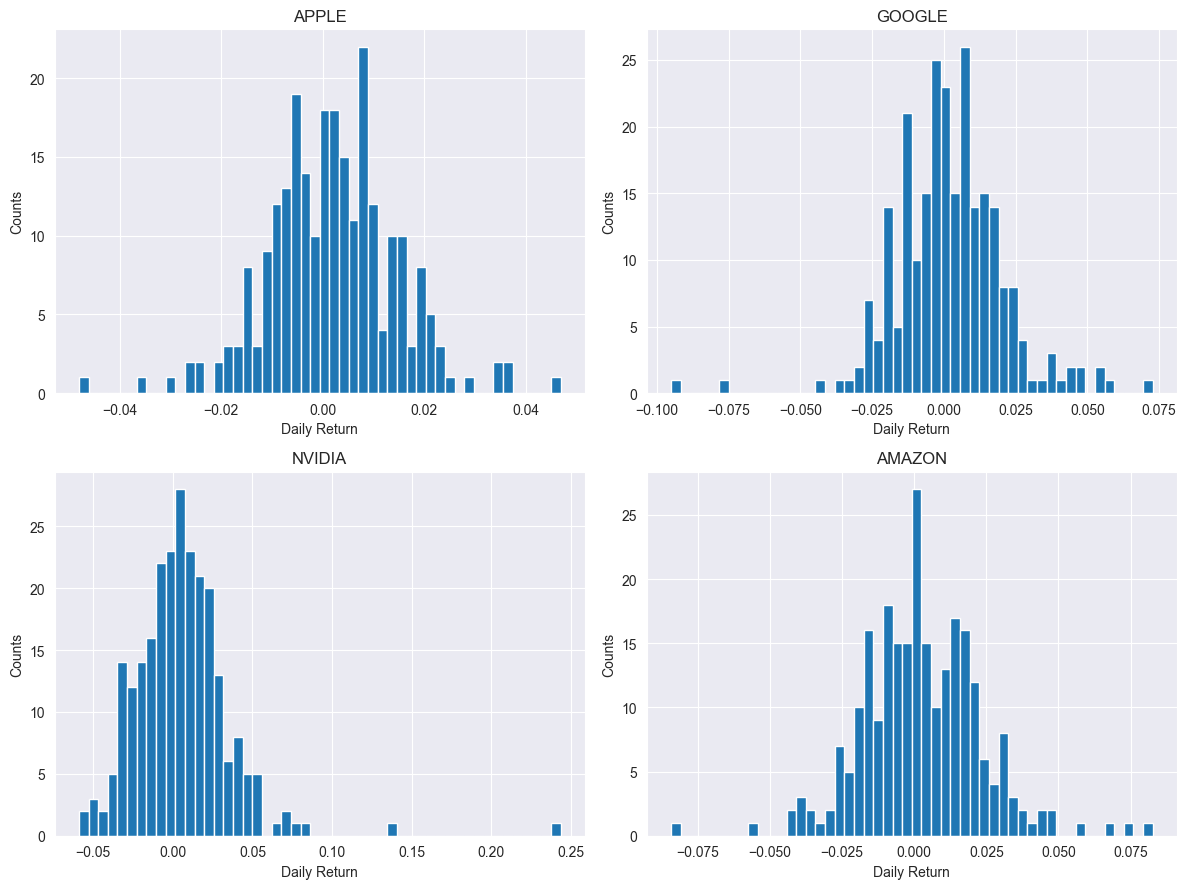

In [108]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

<Axes: >

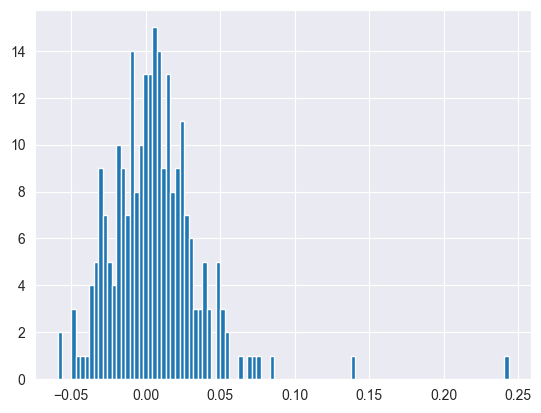

In [11]:
# Only histogram for NVDIA
NVDA['Daily Return'].hist(bins=100)

We will use the `dropna()` function to remove the NaN values and facilitate their interpretation by seaborn.

<Axes: xlabel='Daily Return', ylabel='Density'>

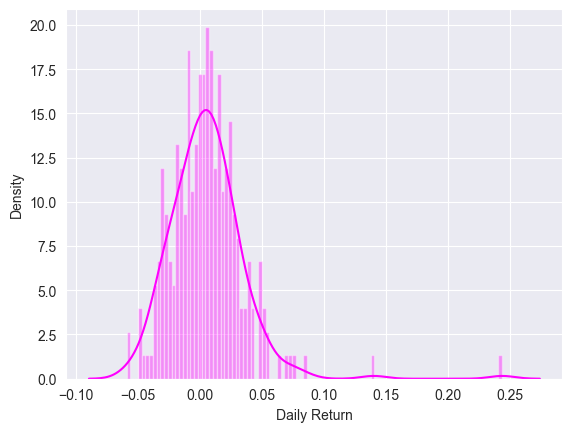

In [12]:
sns.distplot(NVDA['Daily Return'].dropna(), bins=100, color='magenta')

What if we aimed to assess the returns of every stock on our list? To achieve this, we must construct a DataFrame containing all the ['Close'] columns from each of the stock DataFrames.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df=pdr.get_data_yahoo(tech_list, start, end)['Close']
closingprice_df.head(10)

[                       0%%                      ]

[*********************100%%**********************]  4 of 4 completed


Ticker            AAPL       AMZN      GOOGL        NVDA
Date                                                    
2023-01-03  125.070000  85.820000  89.120003  143.149994
2023-01-04  126.360001  85.139999  88.080002  147.490005
2023-01-05  125.019997  83.120003  86.199997  142.649994
2023-01-06  129.619995  86.080002  87.339996  148.589996
2023-01-09  130.149994  87.360001  88.019997  156.279999
2023-01-10  130.729996  89.870003  88.419998  159.089996
2023-01-11  133.490005  95.089996  91.519997  160.009995
2023-01-12  133.410004  95.269997  91.129997  165.110001
2023-01-13  134.759995  98.120003  92.120003  168.990005
2023-01-17  135.940002  96.050003  91.290001  177.020004

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the NVDA stock.

In [14]:
# Make a new tech returns DataFrame
tech_returns=closingprice_df.pct_change()
tech_returns.head()

Ticker          AAPL      AMZN     GOOGL      NVDA
Date                                              
2023-01-03       NaN       NaN       NaN       NaN
2023-01-04  0.010314 -0.007924 -0.011670  0.030318
2023-01-05 -0.010605 -0.023726 -0.021344 -0.032816
2023-01-06  0.036794  0.035611  0.013225  0.041640
2023-01-09  0.004089  0.014870  0.007786  0.051753

### What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor.
Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.<br><br>
GOOGL is a Alphabet Inc Class A Stock.

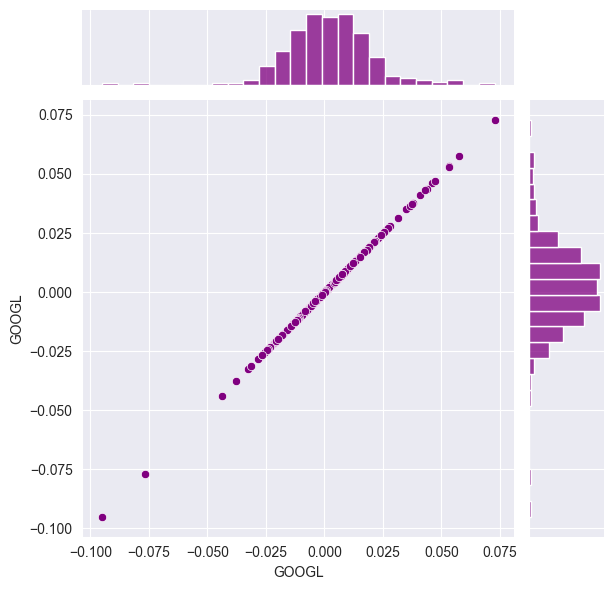

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='purple')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.<br><br>
So let's go ahead and compare Google (GOOGL) and Amazon (AMZN) the same way.

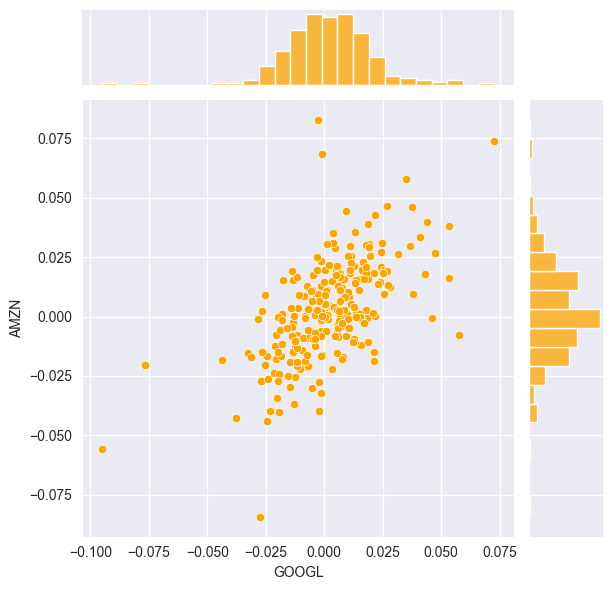

In [16]:
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', color='orange')

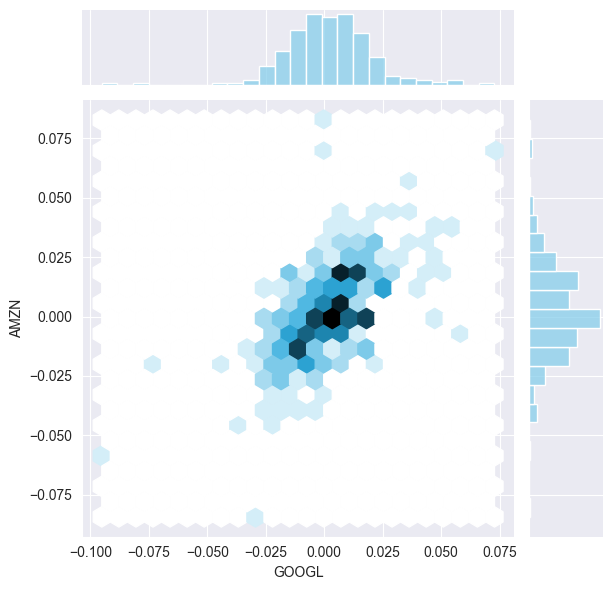

In [17]:
# with Hex plot
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='hex', color='skyblue')

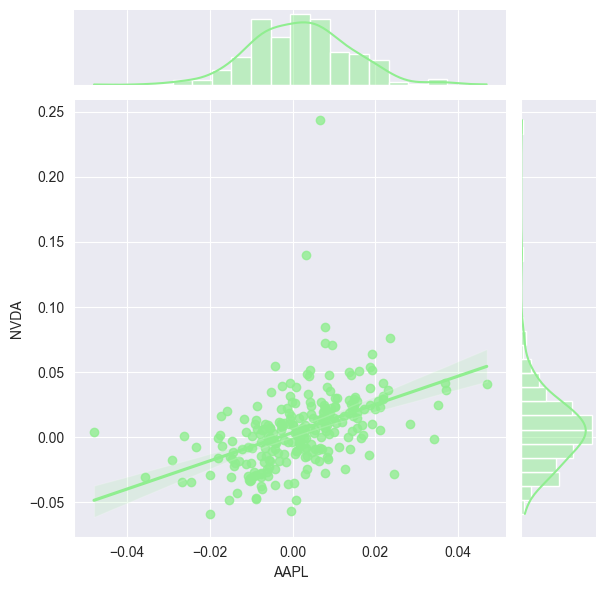

In [18]:
# Lets check out for Apple and Nvidia with reg jointplot
sns.jointplot(x='AAPL', y='NVDA', data=tech_returns, kind='reg', color='lightgreen')

Fascinatingly, the Pearson correlation coefficient, also referred to as the Pearson product-moment correlation coefficient, provides insights into the level of correlation between daily percentage returns. For further details, refer to this link:
- [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

But for a quick intuitive sense, check out the picture below.

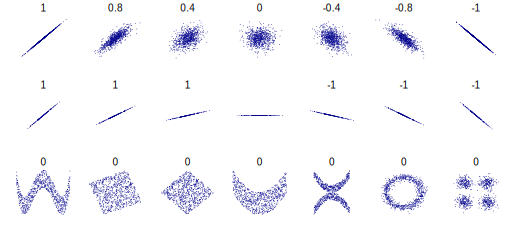

In [19]:
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use `sns.pairplot()` to automatically create this plot

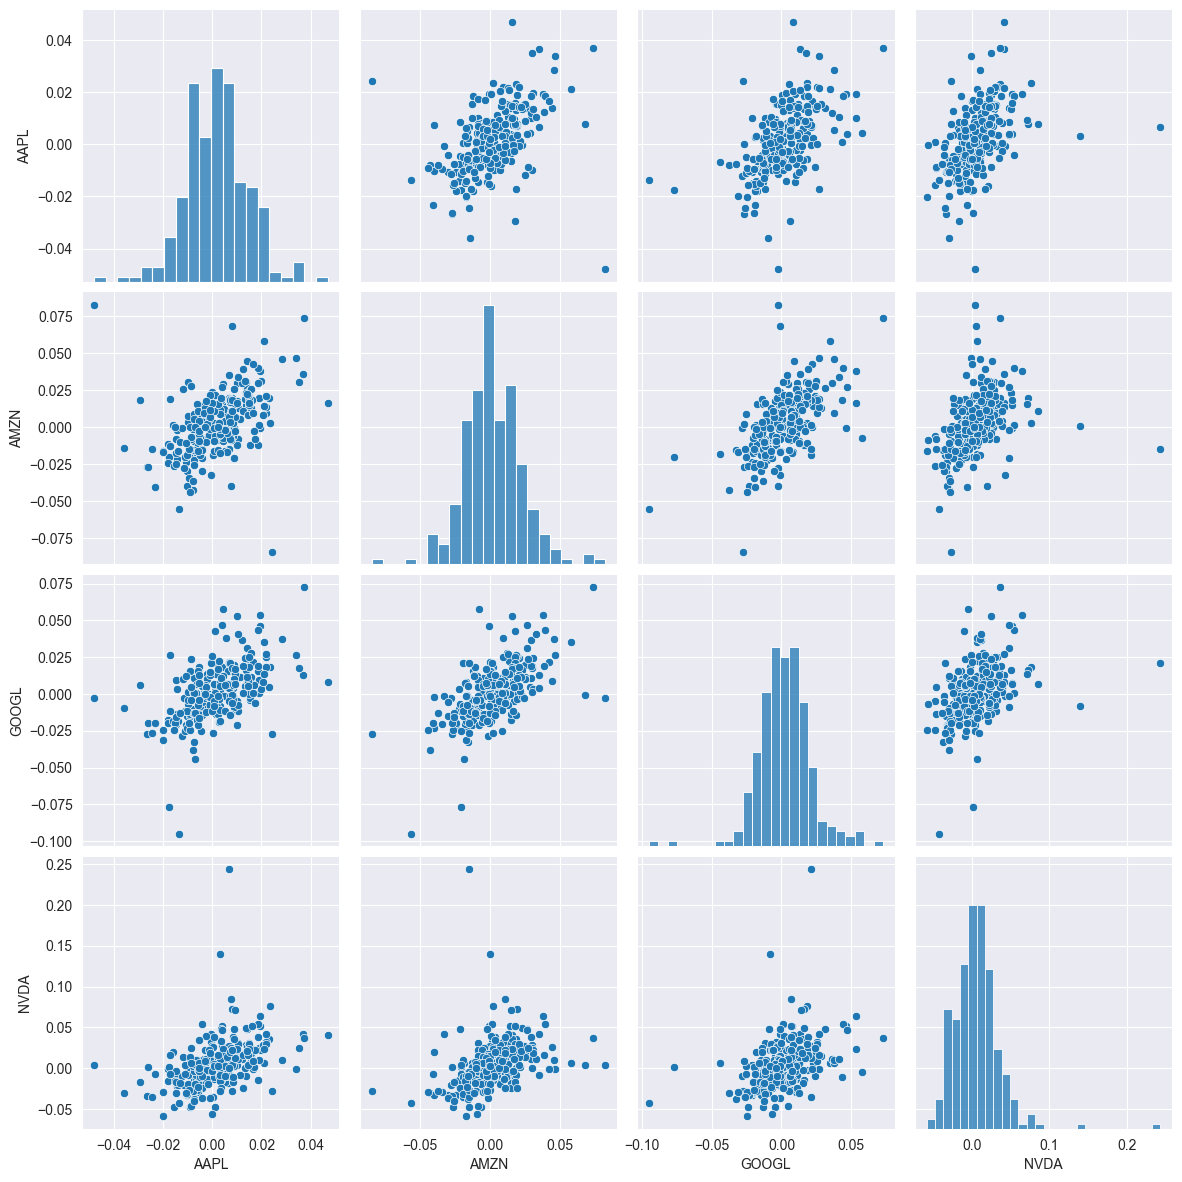

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above, we observe the interrelationships in daily returns across all stocks. A cursory examination reveals a notable correlation between the daily returns of Google and Amazon. Delving deeper into this specific comparison could prove insightful. While the convenience of employing `sns.pairplot()` is commendable, we can leverage `sns.PairGrid()` for comprehensive control over the figure, including the types of plots in the diagonal, upper triangle, and lower triangle.<br><br>
Below is an illustration showcasing the extensive capabilities of seaborn to accomplish this outcome.

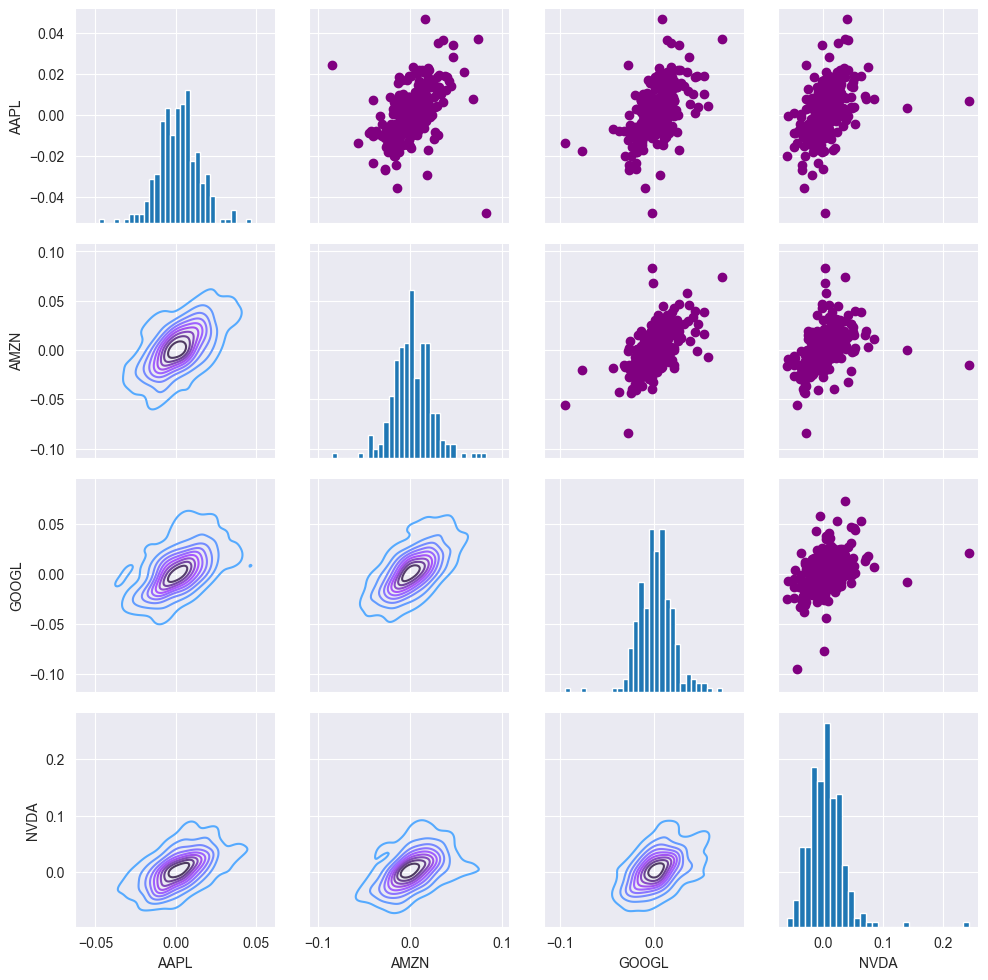

In [21]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

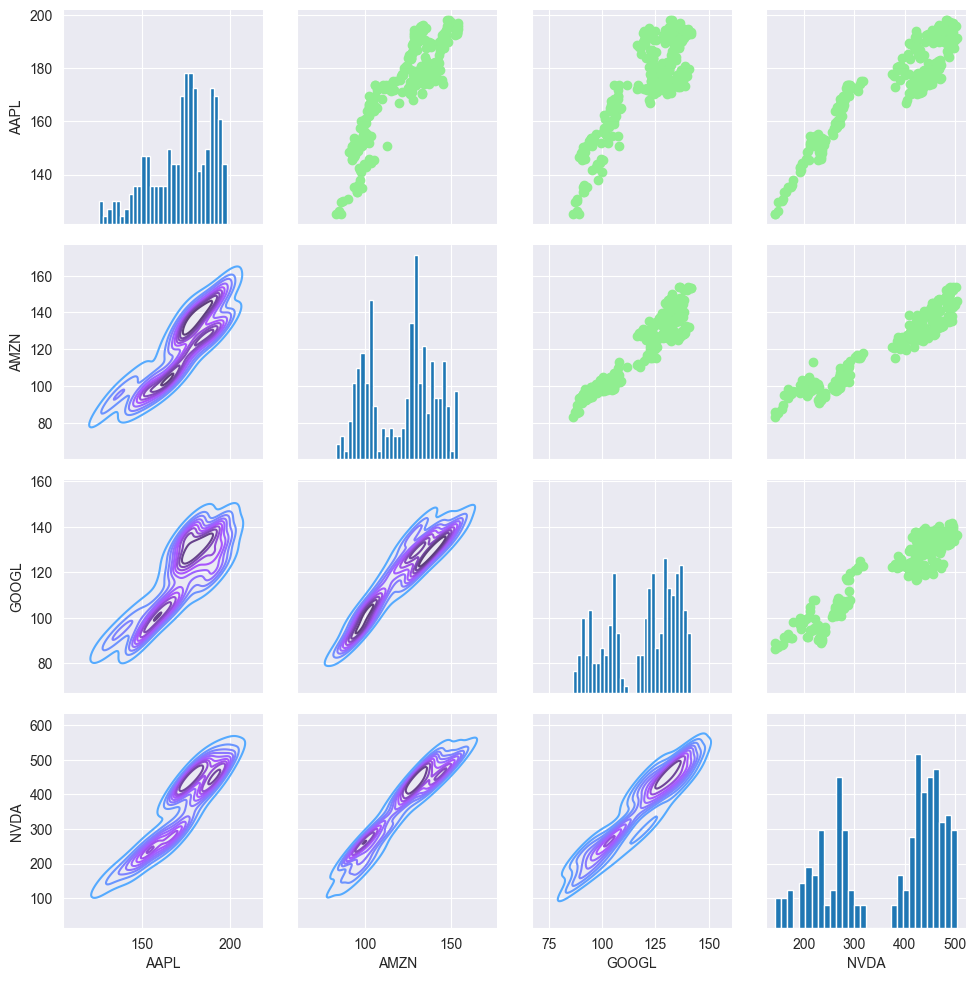

In [22]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='lightgreen')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Ultimately, we can generate a correlation plot to obtain precise numerical values representing the correlations among the stocks' daily return values. Upon scrutinizing the closing prices, a compelling relationship between Google and Amazon stocks becomes apparent.

In [23]:
# Compute the correlation matrix
cm_tech_returns=tech_returns.corr()
cm_tech_returns

Ticker      AAPL      AMZN     GOOGL      NVDA
Ticker                                        
AAPL    1.000000  0.442150  0.528196  0.446381
AMZN    0.442150  1.000000  0.600858  0.380434
GOOGL   0.528196  0.600858  1.000000  0.405963
NVDA    0.446381  0.380434  0.405963  1.000000

<Axes: xlabel='Ticker', ylabel='Ticker'>

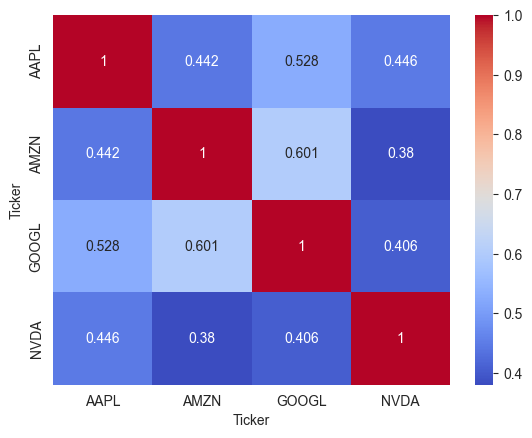

In [24]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(cm_tech_returns,annot=True,fmt=".3g",cmap='coolwarm')

In [25]:
# Lets check out the correlation between closing prices of stocks
cm_closing=closingprice_df.corr()
cm_closing

Ticker      AAPL      AMZN     GOOGL      NVDA
Ticker                                        
AAPL    1.000000  0.881090  0.851049  0.918985
AMZN    0.881090  1.000000  0.939586  0.955786
GOOGL   0.851049  0.939586  1.000000  0.947392
NVDA    0.918985  0.955786  0.947392  1.000000

<Axes: xlabel='Ticker', ylabel='Ticker'>

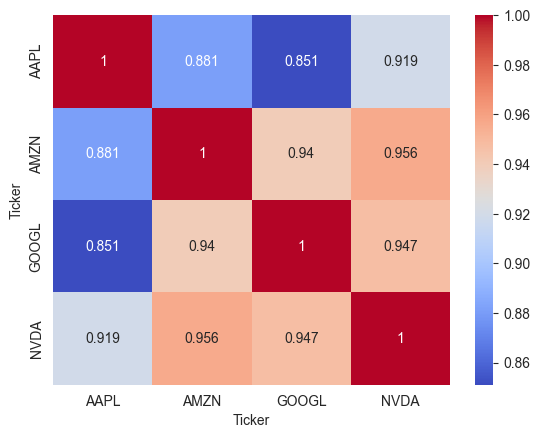

In [26]:
sns.heatmap(cm_closing, annot=True, fmt=".3g", cmap='coolwarm')

Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Nvidia had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.<br><br>
Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.
## Risk Analysis
There are numerous methods to quantify risk. One of the simplest approaches, utilizing the data collected on daily percentage returns, involves comparing the expected return with the standard deviation of these returns (risk).

In [27]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_returns DataFrame
rets=tech_returns.dropna()
rets.head(10)

Ticker          AAPL      AMZN     GOOGL      NVDA
Date                                              
2023-01-04  0.010314 -0.007924 -0.011670  0.030318
2023-01-05 -0.010605 -0.023726 -0.021344 -0.032816
2023-01-06  0.036794  0.035611  0.013225  0.041640
2023-01-09  0.004089  0.014870  0.007786  0.051753
2023-01-10  0.004456  0.028732  0.004544  0.017981
2023-01-11  0.021112  0.058084  0.035060  0.005783
2023-01-12 -0.000599  0.001893 -0.004261  0.031873
2023-01-13  0.010119  0.029915  0.010864  0.023500
2023-01-17  0.008756 -0.021097 -0.009010  0.047518
2023-01-18 -0.005370 -0.006143 -0.001862 -0.018360

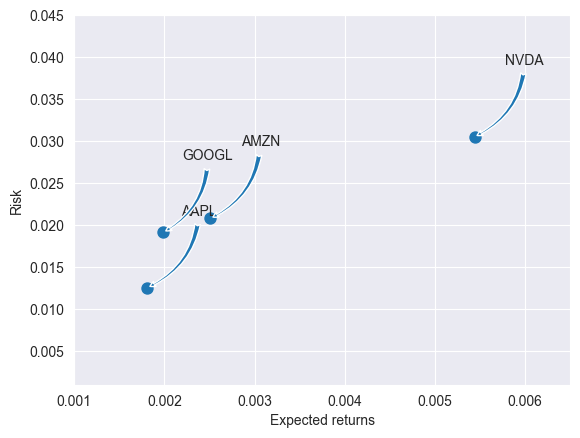

In [28]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area=np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([0.001, 0.0065])
plt.ylim([0.001, 0.045])

# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(50, 50),
        textcoords='offset points',
        ha='right',
        va='bottom',
        arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3, rad=-0.3')
    )

By looking at the scatter plot we can say these stocks heve lower risk and positive expected returns.
### Value at Risk
Let's proceed to establish a value-at-risk parameter for our stocks. Value-at-risk represents the potential loss amount (i.e., the risk exposure) within a specified confidence interval. Various estimation methods exist for determining value at risk. Let's now explore a few of these methods in detail.<br><br>
One such method is the "bootstrap" approach. Here, we derive empirical quantiles from a histogram of daily returns. For further insight into quantiles, you can refer to this link:<br>
[Quantile Wikipedia Page](https://en.wikipedia.org/wiki/Quantile)<br><br>
To illustrate, let's recreate the histogram of daily returns for Nvidia stock.

<Axes: xlabel='Daily Return', ylabel='Density'>

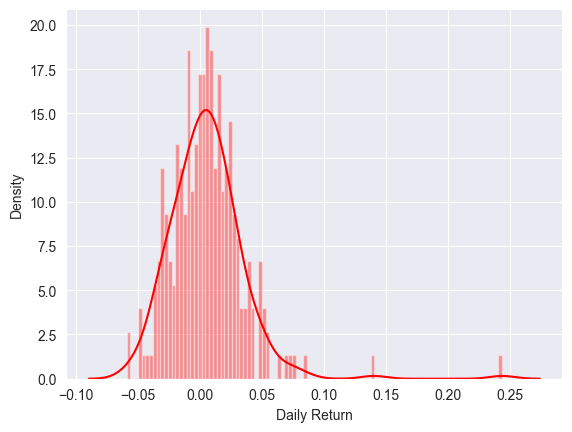

In [29]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(NVDA['Daily Return'].dropna(), bins=100, color='red')

Now we can use quantile to get the risk value for the stock

In [30]:
# The 0.05 empirical quantile of daily returns
# For NVDA stocks
rets['NVDA'].quantile(0.05)

-0.03457556531104222

In [31]:
emp_quantile=0.05
print(f"The {emp_quantile} empirical quantile of daily returns is at {np.round(rets['NVDA'].quantile(0.05), 3)}. Than means that with {(1-emp_quantile)*100}% condifence, our worst daily loss will not exceed {np.round(rets['NVDA'].quantile(0.05)*-100, 1)}%. If we have a 1 million dollar investment, our one-day {emp_quantile*100}% VAr is {np.round(rets['NVDA'].quantile(0.05)*-1, 3)} * 1,000,000 = ${np.round(rets['NVDA'].quantile(0.05)*-1000000, 2)}")

The 0.05 empirical quantile of daily returns is at -0.035. Than means that with 95.0% condifence, our worst daily loss will not exceed 3.5%. If we have a 1 million dollar investment, our one-day 5.0% VAr is 0.035 * 1,000,000 = $34575.57


In [32]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.02731209661029126

In [33]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.025085873013623906

In [34]:
# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.017176473412086814

### Value at Risk using the Monte Carlo method
Utilizing the Monte Carlo method involves conducting numerous trials under varying market conditions, followed by the computation of portfolio losses for each trial. Subsequently, we aggregate these simulations to gauge the stock's level of risk.<br><br>
Let's begin by providing a concise overview of our approach:<br><br>
We will employ the geometric Brownian motion (GBM), which is formally recognized as a Markov process. Under GBM, the stock price undergoes a random walk, aligning with, at the very least, the weak form of the efficient market hypothesis (EMH): past price data is already assimilated, and future price movements are "conditionally independent" of past movements.<br><br>
In essence, this implies that past stock price information doesn't dictate the future trajectory of stock prices perfectly. Instead, the change in stock price is represented by two terms. The first term, known as "drift," signifies the average daily return multiplied by the change in time. The second term, termed "shock," reflects the random fluctuations in stock price that occur over each time period. By iteratively simulating this sequence of drift and shock thousands of times, we can approximate the potential future trajectory of the stock price.<br><br>
For further insights into employing the Monte Carlo method for stocks and simulating stock prices using the GBM model (geometric Brownian motion), you can refer to the following resource: 
- [How to use Monte Carlo Simulation with GBM](https://www.investopedia.com/articles/07/montecarlo.asp)

To illustrate a basic Monte Carlo approach, we will initiate with a limited number of simulations. Initially, we'll define the variables that will be utilized in the Google stock DataFrame, GOOGL.

In [35]:
rets.head()

Ticker          AAPL      AMZN     GOOGL      NVDA
Date                                              
2023-01-04  0.010314 -0.007924 -0.011670  0.030318
2023-01-05 -0.010605 -0.023726 -0.021344 -0.032816
2023-01-06  0.036794  0.035611  0.013225  0.041640
2023-01-09  0.004089  0.014870  0.007786  0.051753
2023-01-10  0.004456  0.028732  0.004544  0.017981

In [36]:
# Set up our time horizon
days=365

# Now our delta
dt=1/days

# Now let's grab our mu (drift) from the expected return data we got for Google
mu=rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for Google
sigma=rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated from our daily returns.

In [37]:
def stock_monte_carlo(start_price, days, mu, sigma):
    '''
    This function takes in starting stock price, days of simulation, mu, sigma,
    and returns simulated price array
    '''
    
    # Define a price array
    price=np.zeros(days)
    price[0]=start_price
    
    # Shok and Drift
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        # Calculate shock
        shock[x]=np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        # Calculate drift
        drift[x]=mu*dt
        # Calculate Price
        price[x]=price[x-1]+(price[x-1]*drift[x]+shock[x])
    
    return price

Now lets put above function to work

In [38]:
# For Google stock - GOOGL
GOOGL.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  89.589996  91.050003  88.519997  89.120003  89.120003  28131200
2023-01-04  90.349998  90.650002  87.269997  88.080002  88.080002  34854800
2023-01-05  87.470001  87.570000  85.900002  86.199997  86.199997  27194400
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.339996  41381500
2023-01-09  88.360001  90.050003  87.860001  88.019997  88.019997  29003900

In [39]:
start_price=GOOGL.iloc[0, GOOGL.columns.get_loc('Open')]
start_price

89.58999633789062

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

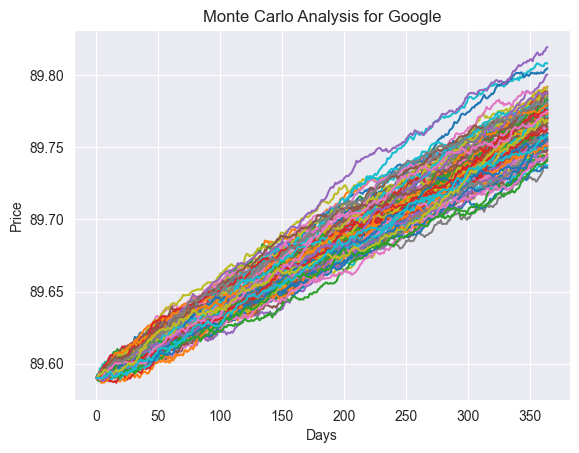

In [40]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


The following function is designed to automate the analysis previously conducted for each of the companies entered within a list

In [41]:
def monte_carlo_analysis_market(market_list, days=365, dt=1/days):
    for item in market_list:
        rets[item].quantile(0.05)
        mu=rets.mean()[item]
        sigma=rets.std()[item]
        
        new_item=globals()[item]
        start_price=new_item.iloc[0, new_item.columns.get_loc('Open')]
        
        # Show the loading DataFrame
        print(f'\nStock Name {item}:')
        print(new_item.head())
        
        for run in range(100):
            plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
        plt.xlabel("Days")
        plt.ylabel("Price")  
        plt.title(f'Monte Carlo Analysis for {item}')
        plt.show()


Stock Name AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216301   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735229   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261612   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


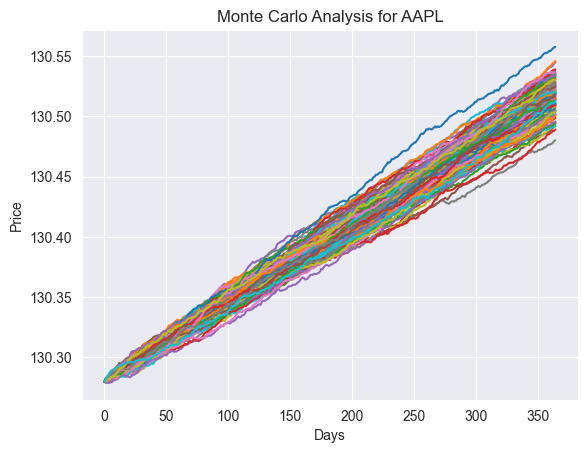


Stock Name GOOGL:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  89.589996  91.050003  88.519997  89.120003  89.120003  28131200
2023-01-04  90.349998  90.650002  87.269997  88.080002  88.080002  34854800
2023-01-05  87.470001  87.570000  85.900002  86.199997  86.199997  27194400
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.339996  41381500
2023-01-09  88.360001  90.050003  87.860001  88.019997  88.019997  29003900


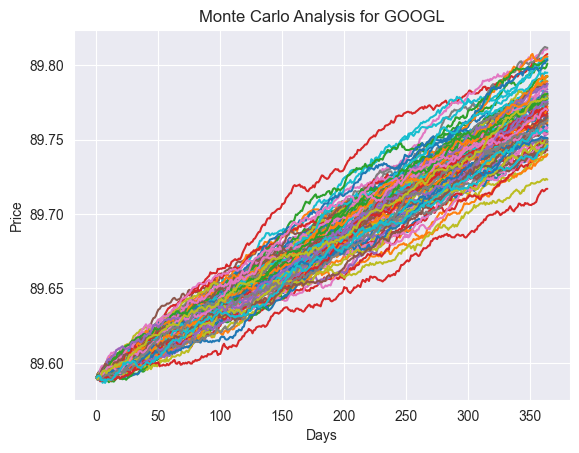


Stock Name NVDA:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  148.509995  149.960007  140.960007  143.149994  143.079788   
2023-01-04  145.669998  148.529999  142.410004  147.490005  147.417679   
2023-01-05  144.910004  145.639999  141.479996  142.649994  142.580048   
2023-01-06  144.740005  150.100006  140.339996  148.589996  148.517136   
2023-01-09  152.839996  160.559998  151.410004  156.279999  156.203369   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                   
2023-01-03  40127700             NaN             NaN             NaN   
2023-01-04  43132400             NaN             NaN             NaN   
2023-01-05  38916800             NaN             NaN             NaN   
2023-01-06  40504400             NaN             NaN             NaN   
2023-01-09  50423100           

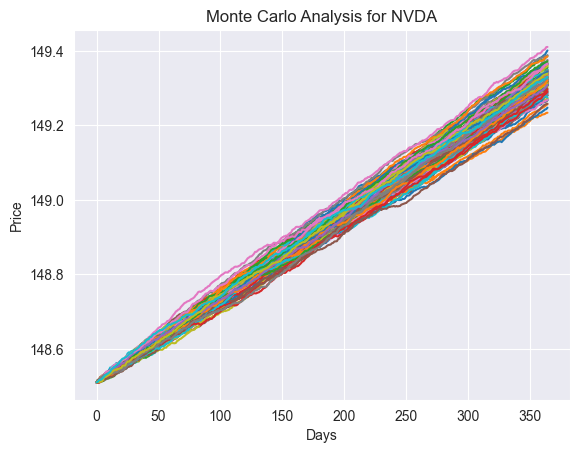


Stock Name AMZN:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  85.459999  86.959999  84.209999  85.820000  85.820000  76706000
2023-01-04  86.550003  86.980003  83.360001  85.139999  85.139999  68885100
2023-01-05  85.330002  85.419998  83.070000  83.120003  83.120003  67930800
2023-01-06  83.029999  86.400002  81.430000  86.080002  86.080002  83303400
2023-01-09  87.459999  89.480003  87.080002  87.360001  87.360001  65266100


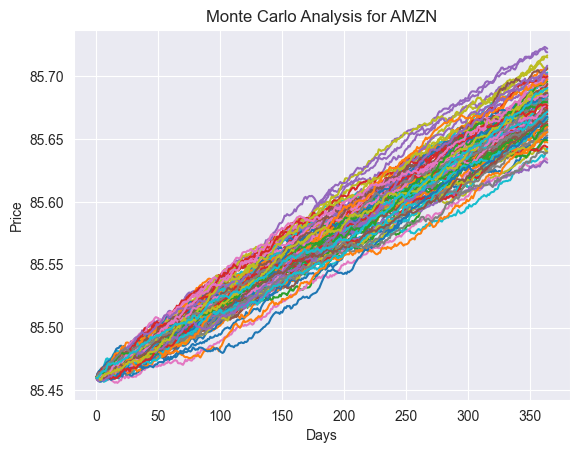

In [42]:
monte_carlo_analysis_market(market_list=tech_list)

Let's go ahead and get a histogram of the end results for a muxh larger run (note: this could take a little while to run, depending ont he number of runs chosen)

In [43]:
# Lets start with Google stock price
start_price=GOOGL.iloc[0, GOOGL.columns.get_loc('Open')]

# Set a large number of runs
runs=10000

rets['GOOGL'].quantile(0.05)
mu=rets.mean()['GOOGL']
sigma=rets.std()['GOOGL']

# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram, as well as use quantile to define our risk for this stock.
For more info on quantiles, check out the following link:
- [Quantile](https://en.wikipedia.org/wiki/Quantile)

Text(0.5, 1.0, 'Final price distribution for Google Stock (GOOGL) after 365 days')

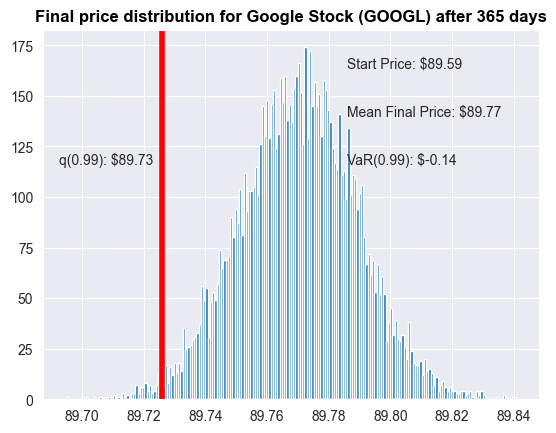

In [46]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q=np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Google Stock (GOOGL) after %s days" % days, weight='bold', color='black')

After analyzing the 1% empirical quantile of the final price distribution, we have estimated the Value at Risk (VaR) for Google Stock (GOOGL) to be $-0.14 per investment of $89.59 (the price of one initial Google Stock).

In essence, this indicates that for every initial GOOGL stock purchased, there is a 99% chance of risking approximately $-0.14, as per our Monte Carlo Simulation. Now, let's proceed to plot the remaining stocks to further estimate VaR using our Monte Carlo Simulation.

In [47]:
# Lets start with Amazon stock price
start_price=AMZN.iloc[0, AMZN.columns.get_loc('Open')]

# Set a large number of runs
runs=10000

rets['AMZN'].quantile(0.05)
mu=rets.mean()['AMZN']
sigma=rets.std()['AMZN']

# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock (AMZN) after 365 days')

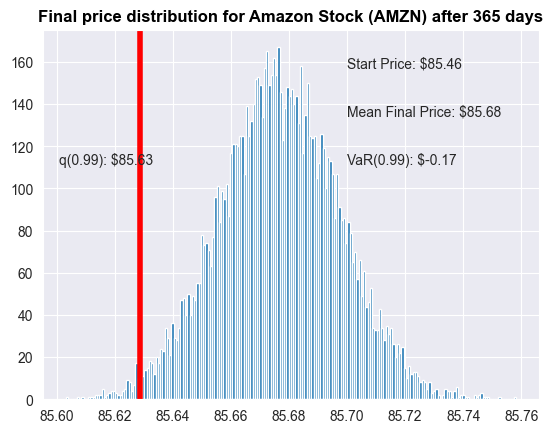

In [48]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q=np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Amazon Stock (AMZN) after %s days" % days, weight='bold', color='black')

This basically means for every initial AMZN stock you purchase you're putting about $-0.17 at risk 99% of the time from our Monte Carlo Simulation.

In [49]:
# Lets start with Apple stock price
start_price=AAPL.iloc[0, AAPL.columns.get_loc('Open')]

# Set a large number of runs
runs=10000

rets['AAPL'].quantile(0.05)
mu=rets.mean()['AAPL']
sigma=rets.std()['AAPL']

# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock (AAPL) after 365 days')

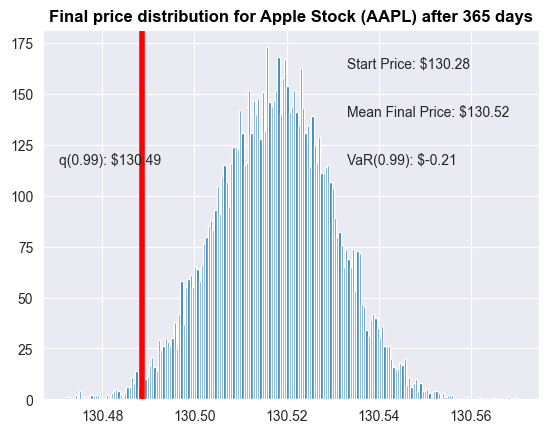

In [50]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q=np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Apple Stock (AAPL) after %s days" % days, weight='bold', color='black')

This basically means for every initial AAPL stock you purchase you're putting about $-0.21 at risk 99% of the time from our Monte Carlo Simulation.

In [51]:
# Lets start with Nvidia stock price
start_price=NVDA.iloc[0, NVDA.columns.get_loc('Open')]

# Set a large number of runs
runs=10000

rets['NVDA'].quantile(0.05)
mu=rets.mean()['NVDA']
sigma=rets.std()['NVDA']

# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Nvidia Stock (NVDA) after 365 days')

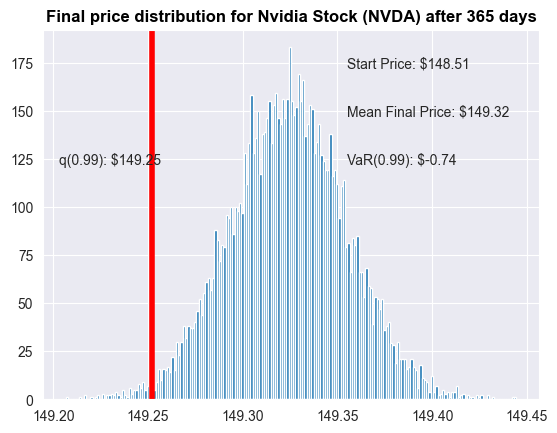

In [52]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q=np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Nvidia Stock (NVDA) after %s days" % days, weight='bold', color='black')

This basically means for every initial NVDA stock you purchase you're putting about $-0.74 at risk 99% of the time from our Monte Carlo Simulation.

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.

We'll estimate the VaR for:

- Johnson & Johnson > JNJ (U.S.: NYSE) [JNJ](https://www.wsj.com/market-data/quotes/JNJ)
- Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](https://www.wsj.com/market-data/quotes/WMT)
- Nike Inc. > NKE (U.S.: NYSE) [NKE](https://www.wsj.com/market-data/quotes/NKE)

By using the above methods to get Value at Risk.


In [53]:
# List of NYSE_stocks for analytics
NYSE_list=['JNJ','NKE','WMT']

# set up Start and End time for data grab
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in NYSE_list:
    globals()[stock]=pdr.get_data_yahoo(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Let's go ahead and play aorund with the JNJ(Johnson & Johnson) Stock DataFrame to get a feel for the data.

In [54]:
JNJ.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  176.160004  178.380005  176.009995  178.190002  171.638855   
2023-01-04  178.889999  180.190002  178.479996  180.130005  173.507538   
2023-01-05  179.020004  179.990005  178.410004  178.800003  172.226440   
2023-01-06  180.130005  180.929993  179.389999  180.250000  173.623123   
2023-01-09  179.300003  179.759995  175.179993  175.580002  169.124817   

             Volume  
Date                 
2023-01-03  6344900  
2023-01-04  9788800  
2023-01-05  6255300  
2023-01-06  5706000  
2023-01-09  7925300

In [55]:
JNJ.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   160.327280  161.368800  159.177520  160.295320  156.607216   
std      7.084839    7.220845    7.021195    7.112270    6.427717   
min    146.089996  147.240005  144.949997  145.600006  143.354843   
25%    154.984997  155.915001  153.779995  155.062500  152.233147   
50%    159.739998  160.415001  158.794998  159.529999  156.063339   
75%    164.332497  165.340004  163.075005  164.204998  160.244263   
max    180.130005  180.929993  179.389999  180.250000  173.623123   

             Volume  
count  2.500000e+02  
mean   1.119850e+07  
std    1.626071e+07  
min    3.351400e+06  
25%    5.830700e+06  
50%    6.943250e+06  
75%    9.349000e+06  
max    1.513195e+08

In [56]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Plotting one of the closing prices of NYSE stocks.

<Axes: title={'center': 'Closing Price - JNJ'}, xlabel='Date'>

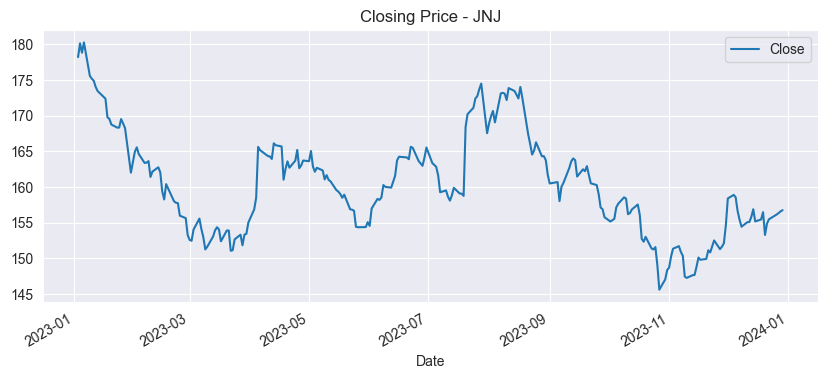

In [57]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title="Closing Price - JNJ", legend=True, figsize=(10, 4))

<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

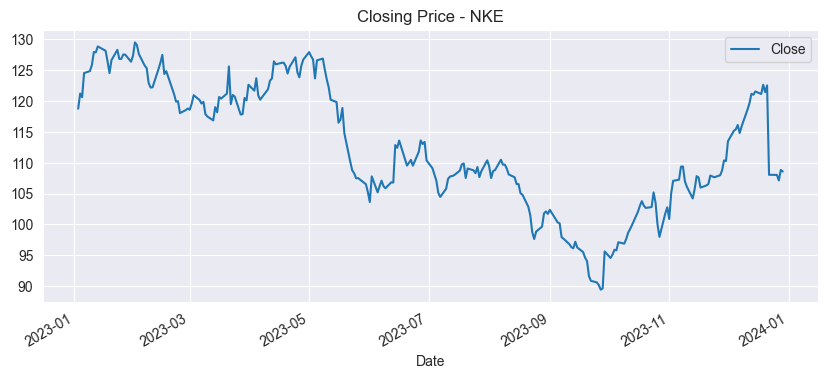

In [58]:
# Let's see a historical view of the closing price for NKE (Nike Inc.)
NKE['Close'].plot(title="Closing Price - NKE", legend=True, figsize=(10, 4))

<Axes: title={'center': 'Closing Price - WMT'}, xlabel='Date'>

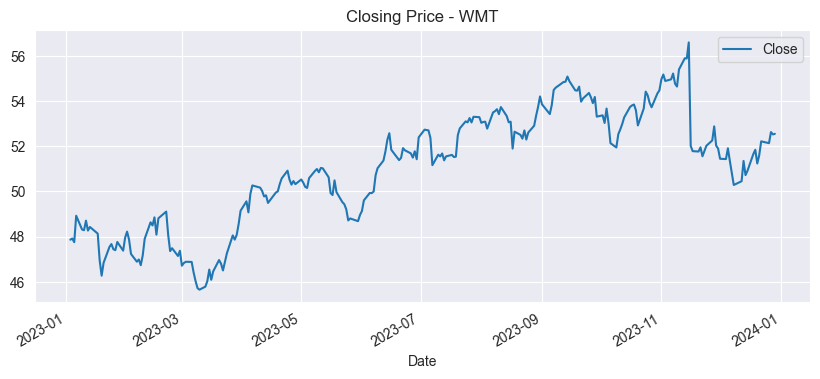

In [59]:
# Let's see a historical view of the closing price for WMT (Wal-Mart Stores Inc)
WMT['Close'].plot(title="Closing Price - WMT", legend=True, figsize=(10, 4))

### Value at risk using the "Bootstrap" method
We will calculate the empirical quantiles from a histogram of daily returns.<br><br>
Using pandas to retrieve the daily returns for the JNJ, WMT & NIKE stock.

In [60]:
# We'll use pct_change to find the percent change for each day

# For JNJ stocks
JNJ['Daily Return']=JNJ['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Density'>

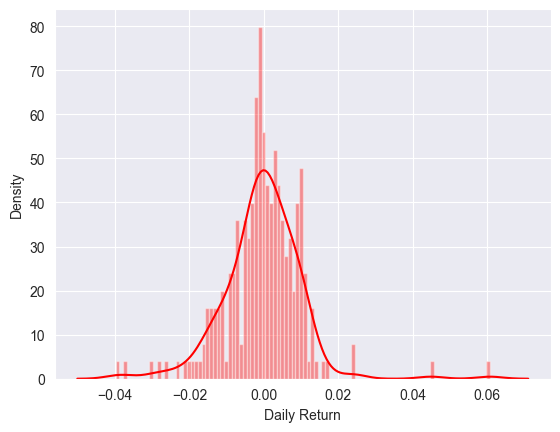

In [61]:
# Note the use of dropna() here, atherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(), bins=100, color='red')

In [62]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.01608573351886198

The 0.05 empirical quantile of JNJ stock daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1,6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [63]:
# For WMT stocks
WMT['Daily Return']=WMT['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Density'>

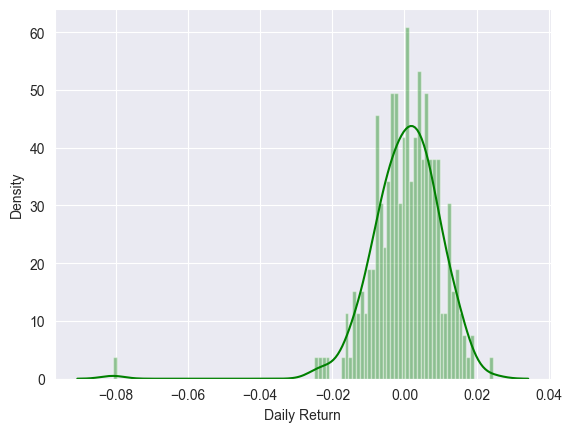

In [64]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='green')

In [65]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.01388923110529212

The 0.05 empirical quantile of WMT stock daily returns is at -0.014. That means that with 95% confidence, our worst daily loss will not exceed 1.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.014 * 1,000,000 = $14,000.

In [66]:
# For NKE stocks
NKE['Daily Return']=NKE['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Density'>

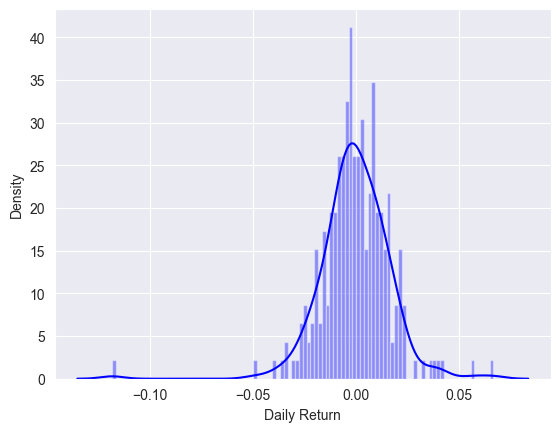

In [67]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='blue')

In [68]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.024143503582714533

The 0.05 empirical quantile of NKE stock daily returns is at -0.024. That means that with 95% confidence, our worst daily loss will not exceed 2.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.024 * 1,000,000 = $24,000.

## Predicting the closing stock price of Microsoft (MSFT)

In [74]:
# Get the stock quote

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2023, 12, 31)

df=pdr.get_data_yahoo('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


In [75]:
# Show the data
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  26.549999  26.959999  26.389999  26.770000  21.238756  64731500
2012-01-04  26.820000  27.469999  26.780001  27.400000  21.738579  80516100
2012-01-05  27.379999  27.730000  27.290001  27.680000  21.960726  56081400
2012-01-06  27.530001  28.190001  27.530001  28.110001  22.301878  99455500
2012-01-09  28.049999  28.100000  27.719999  27.740000  22.008326  59706800

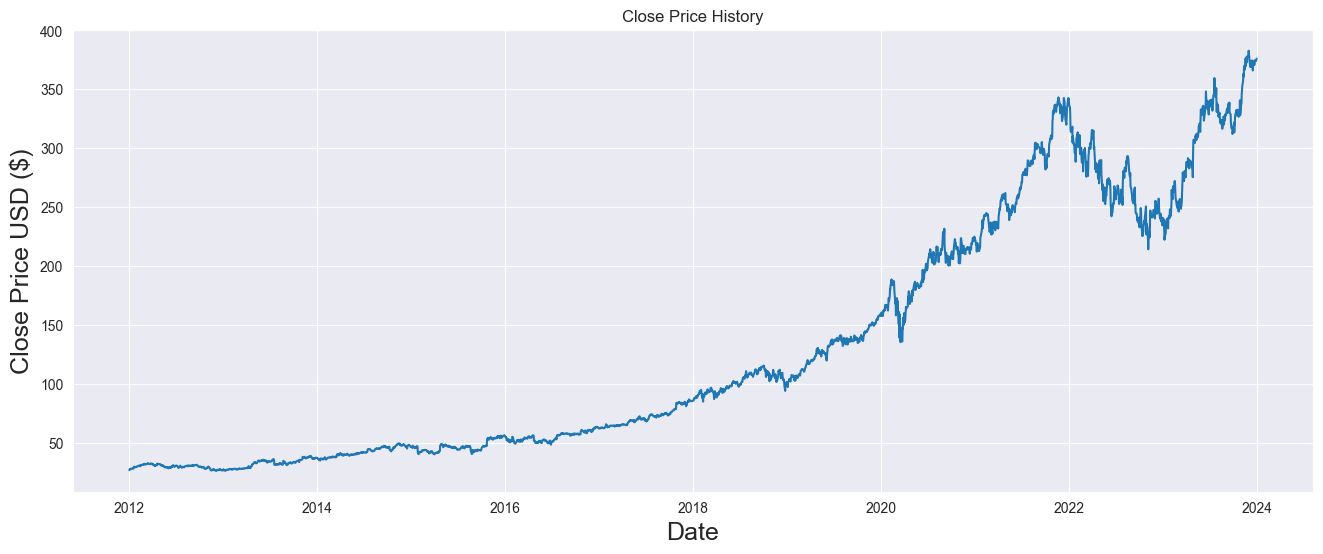

In [76]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [77]:
# Create a new dataframe with only the 'Close' column
data=df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset=data.values

# Get the number of rows to train the model on
training_data_len=int(np.ceil(len(dataset)*0.95))
training_data_len

2868

### Data Normalization
MinMaxScaler is a data normalization technique commonly used in machine learning to scale features to a specified range, typically between 0 and 1. The scaler works by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value). This process ensures that all feature values are proportionally scaled within the specified range, making them more suitable for algorithms sensitive to feature scales, such as gradient descent-based optimization algorithms.

In [79]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00112255],
       [0.00289058],
       [0.00367637],
       ...,
       [0.97578086],
       [0.97917657],
       [0.98130945]])

### Create the training data set

In [81]:
# Create the scaled training data set
train_data=scaled_data[0: int(training_data_len), :]

# Split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(X_train)
        print(y_train)
        print("-"*80)

[array([0.00112255, 0.00289058, 0.00367637, 0.00488311, 0.00384475,
       0.00412539, 0.00378862, 0.00457441, 0.00527601, 0.00530407,
       0.00521988, 0.00491118, 0.00937333, 0.00942946, 0.00833497,
       0.00895237, 0.00878399, 0.00802626, 0.00909269, 0.00886818,
       0.00987848, 0.01004687, 0.01086072, 0.01074846, 0.01116942,
       0.0120394 , 0.0123481 , 0.01159038, 0.01181489, 0.01088878,
       0.0103275 , 0.01380743, 0.01369517, 0.01422838, 0.0137513 ,
       0.01403194, 0.01434064, 0.01397581, 0.01543513, 0.0150703 ,
       0.01661381, 0.01602447, 0.01523868, 0.01456515, 0.01535094,
       0.01582802, 0.01577189, 0.01591222, 0.01768023, 0.01796088,
       0.01818538, 0.01748379, 0.01636124, 0.01577189, 0.01554738,
       0.01579996, 0.01582802, 0.01745573, 0.01725928, 0.01633317])]
[0.016136721323527004]
--------------------------------------------------------------------------------


In [83]:
# Convert the X_train and y_train to numpy arrays
X_train, y_train=np.array(X_train), np.array(y_train)

# Reshape the data
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2808, 60, 1)

### Building the model
A Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN) designed to handle sequence data, such as time series or natural language text. Unlike traditional RNNs, LSTM models are capable of learning long-term dependencies by utilizing specialized memory cells that can maintain information over extended periods. These memory cells have gating mechanisms that regulate the flow of information, allowing the model to selectively forget or remember past information based on the current input. This architecture enables LSTMs to effectively capture patterns in sequential data, making them particularly useful for tasks like speech recognition, language translation, and time series forecasting.

In [87]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))  # Adding a dense layer with ReLU activation
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 256)           264192    
                                                                 
 dropout_3 (Dropout)         (None, 60, 256)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 128)           197120    
                                                                 
 dropout_4 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In this improved model:

- I increased the number of units in the LSTM layers to 256, 128, and 64 respectively to allow the model to capture more complex patterns in the data.
- Dropout layers with a dropout rate of 0.2 are added after each LSTM layer to prevent overfitting.
- I added an additional dense layer with 32 units and ReLU activation to introduce non-linearity to the model.
-The model is compiled using the Adam optimizer and mean squared error loss, which are common choices for regression tasks like stock price prediction.

This enhanced model architecture may help improve the predictive performance for stock price forecasting tasks. Adjustments and fine-tuning may still be necessary based on the specific dataset and desired performance metrics.

In [88]:
# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
79/79 [==============================] - 30s 291ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 2/50
79/79 [==============================] - 19s 239ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/50
79/79 [==============================] - 19s 240ms/step - loss: 8.8348e-04 - val_loss: 0.0011
Epoch 4/50
79/79 [==============================] - 19s 237ms/step - loss: 9.5008e-04 - val_loss: 0.0030
Epoch 5/50
79/79 [==============================] - 19s 239ms/step - loss: 8.4901e-04 - val_loss: 0.0010
Epoch 6/50
79/79 [==============================] - 19s 244ms/step - loss: 5.9485e-04 - val_loss: 0.0010
Epoch 7/50
79/79 [==============================] - 19s 245ms/step - loss: 7.5543e-04 - val_loss: 9.7355e-04
Epoch 8/50
79/79 [==============================] - 19s 241ms/step - loss: 5.6140e-04 - val_loss: 0.0019
Epoch 9/50
79/79 [==============================] - 19s 239ms/step - loss: 5.4730e-04 - val_loss: 0.0010
Epoch 10/50
79/79 [==============================] - 19s 23

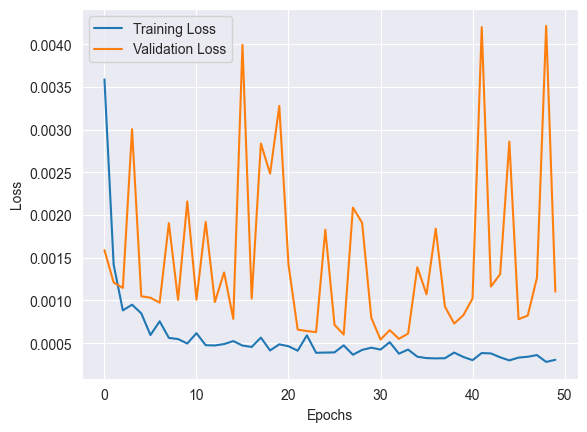

In [89]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Create the testing dataset

In [91]:
# Create a new array containing scaled values from index 1543 to 2002 
test_data=scaled_data[training_data_len-60: , :]

# Create the data sets X_test and y_test
X_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60: i, 0])

# Convert the data to a numpy array
X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get themodels predicted price values
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
print(f"RMSE: {rmse}")

5/5 [==============================] - 2s 84ms/step
RMSE: 20.84860986721361


A root mean squared error (RMSE) value of 20,85 indicates the average magnitude of the error between predicted and observed values is 20.84 units. It quantifies the difference between predicted values and actual values, with lower RMSE values indicating better accuracy of the predictive model.

### Plotting predictions

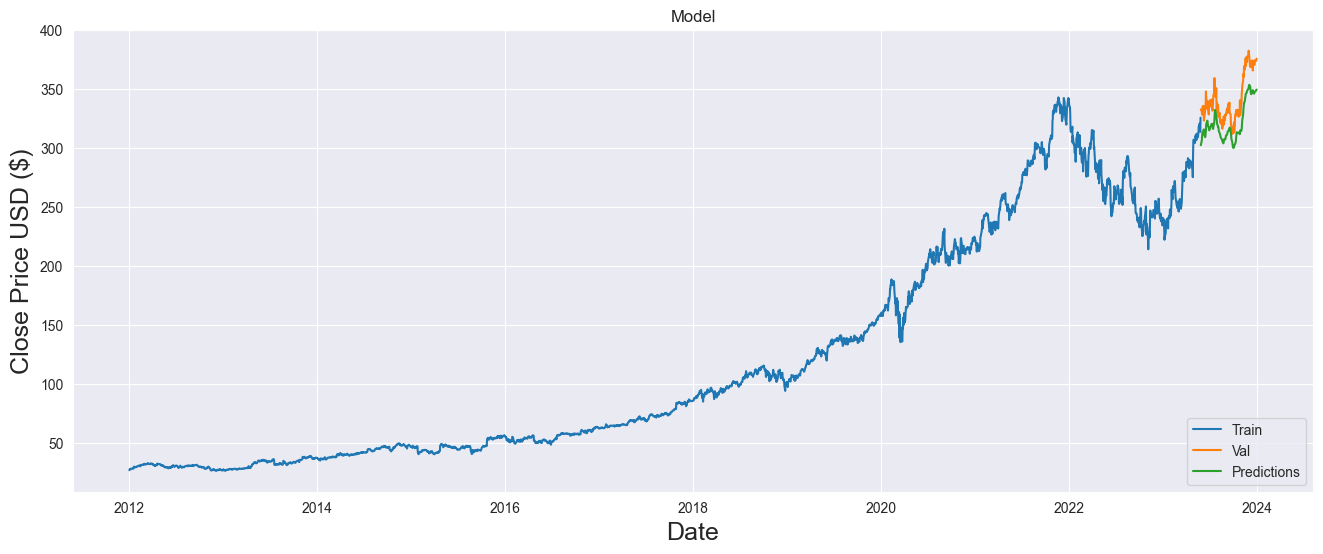

In [93]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [94]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2023-05-26  332.890015   302.540344
2023-05-30  331.209991   306.535858
2023-05-31  328.390015   310.670288
2023-06-01  332.579987   312.621826
2023-06-02  335.399994   313.509705
...                ...          ...
2023-12-22  374.579987   347.982758
2023-12-26  374.660004   348.671997
2023-12-27  374.070007   349.289764
2023-12-28  375.279999   349.520844
2023-12-29  376.040009   349.727051

[150 rows x 2 columns]

### Saving and Loading model

In [96]:
# Save the model
model.save("stock_price_prediction_model.h5")

In [ ]:
# Load the saved model
loaded_model=load_model("stock_price_prediction_model.h5")

## Conclusion
In conclusion, our stock market analysis and prediction project utilizing Long Short-Term Memory (LSTM) networks has demonstrated promising results in forecasting stock trends. By leveraging the power of LSTM, we've been able to capture complex patterns in historical stock data and make informed predictions about future market movements. This project not only showcases the potential of deep learning techniques in financial forecasting but also underscores the importance of continuous refinement and adaptation to ever-evolving market dynamics. Moving forward, further enhancements and refinements to our LSTM model could yield even more accurate predictions, ultimately empowering investors with valuable insights for making informed decisions in the dynamic world of finance.